## Libraries et importation

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder

## Étude manuelle des features

### Chargement

In [4]:
data = pd.read_csv("data/results.csv")
data.head()

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


### Nettoyage

In [5]:
data = data.drop(['date', 'event_id', 'match_id', 'rank_1', 'rank_2'], axis=1)
data.head()

,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,map_wins_1,map_wins_2,match_winner
0,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,0,2,2
1,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,0,2,2
2,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,12,16,2
3,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,0,2,2
4,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,0,2,2


In [6]:
# Dimensions du dataset
print("Nombre de lignes :", data.shape[0])
print("Nombre de colonnes :", data.shape[1])

# Types de variables et valeurs manquantes
data.info()

Nombre de lignes : 45773
Nombre de colonnes : 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_1        45773 non-null  object
 1   team_2        45773 non-null  object
 2   _map          45773 non-null  object
 3   result_1      45773 non-null  int64 
 4   result_2      45773 non-null  int64 
 5   map_winner    45773 non-null  int64 
 6   starting_ct   45773 non-null  int64 
 7   ct_1          45773 non-null  int64 
 8   t_2           45773 non-null  int64 
 9   t_1           45773 non-null  int64 
 10  ct_2          45773 non-null  int64 
 11  map_wins_1    45773 non-null  int64 
 12  map_wins_2    45773 non-null  int64 
 13  match_winner  45773 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 4.9+ MB


In [7]:
# Aperçu des valeurs manquantes
data.isnull().sum().sort_values(ascending=False)

# Suppresion des lignes contenant "Default" pour les cartes
data = data[data["_map"] != "Default"]

### Répartition des cartes jouer

_map
Mirage         9021
Inferno        7485
Train          6566
Overpass       5625
Cache          4613
Nuke           4206
Dust2          4114
Cobblestone    3513
Vertigo         609
Name: count, dtype: int64


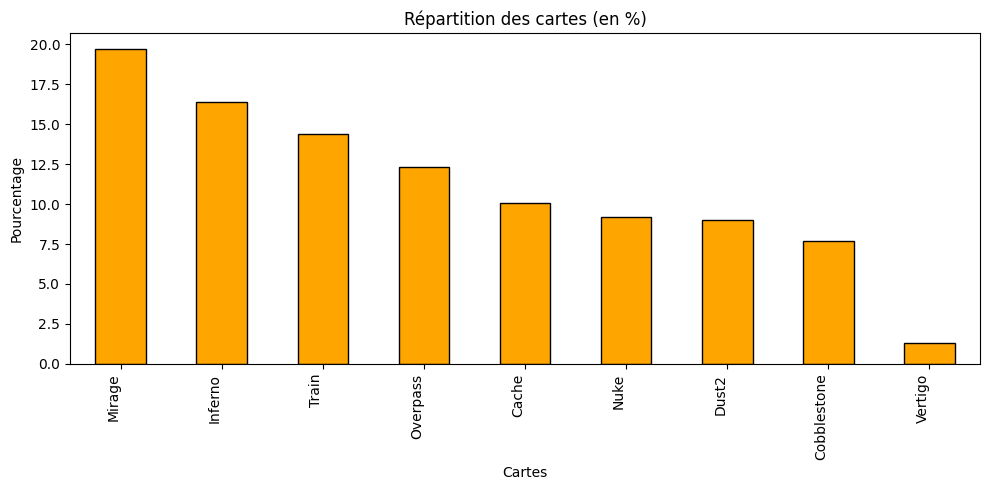

In [8]:
# Fréquence en pourcentage
value_counts = data["_map"].value_counts() 
print(value_counts)
value_counts = data["_map"].value_counts(normalize=True) * 100

plt.figure(figsize=(10,5))
value_counts.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Répartition des cartes (en %)")
plt.xlabel("Cartes")
plt.ylabel("Pourcentage")
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

### Répartition des équipes

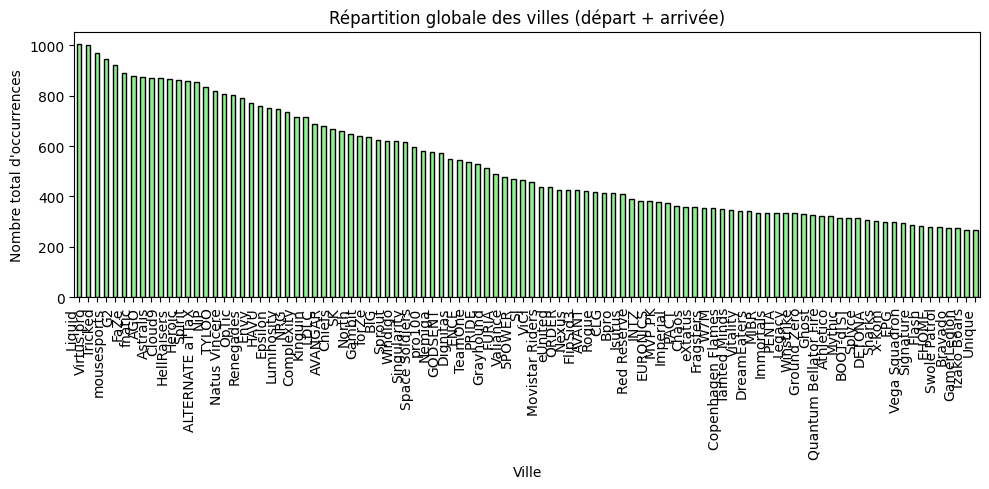

In [9]:
fusion = pd.concat([data["team_1"], data["team_2"]])

plt.figure(figsize=(10,5))
fusion.value_counts().head(100).plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Répartition globale des villes (départ + arrivée)")
plt.xlabel("Ville")
plt.ylabel("Nombre total d'occurrences")
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

## Étude statistique bivariée

In [10]:
# Supposons que ton DataFrame s'appelle df et ta cible 'target'
target = 'map_winner'  # <-- à modifier selon ton dataset

# Séparation des variables numériques et catégorielles
num_cols = data.select_dtypes(include=np.number).columns.drop(target, errors='ignore')
cat_cols = data.select_dtypes(exclude=np.number).columns

print("Variables numériques :", list(num_cols))
print("Variables catégorielles :", list(cat_cols))


Variables numériques : ['result_1', 'result_2', 'starting_ct', 'ct_1', 't_2', 't_1', 'ct_2', 'map_wins_1', 'map_wins_2', 'match_winner']
Variables catégorielles : ['team_1', 'team_2', '_map']


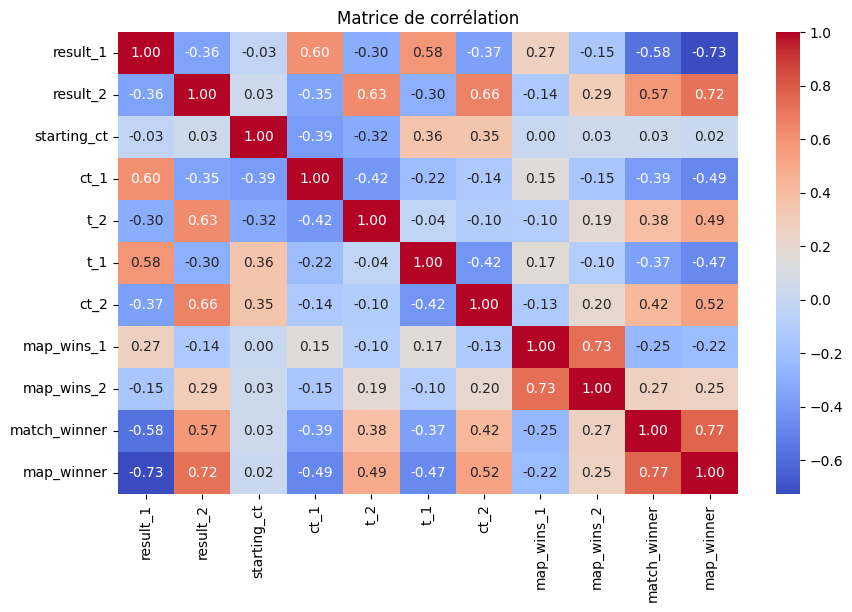

Corrélation avec la cible :
 map_winner      1.000000
match_winner    0.767913
result_2        0.718904
ct_2            0.521909
t_2             0.488067
map_wins_2      0.251229
starting_ct     0.015337
map_wins_1     -0.223789
t_1            -0.473388
ct_1           -0.489160
result_1       -0.728074
Name: map_winner, dtype: float64


In [11]:
# Corrélation entre les variables numériques et la cible
corr_matrix = data[num_cols.tolist() + [target]].corr()
corr_with_target = corr_matrix[target].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

print("Corrélation avec la cible :\n", corr_with_target)

## Regretion

In [12]:
data = data[["team_1", "team_2", "_map", "map_winner"]]
data = data.rename(columns={
    "_map": "map",
    "map_winner": "winner"
})

data["winner"] = data["winner"].replace({
    2: 1,
    1: 0
})

In [13]:
# Sélection des features et de la cible
X = data[["team_1", "team_2", "map"]]
y = data["winner"]

# Encodage des variables catégorielles
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

model = LogisticRegression(max_iter=1000)
model.fit(X_encoded, y)

# Exemple : on prédit si "Vitality" bat "fnatic" sur "Dust2"

# team1, team2, map
spec = ["Vitality", "G2", "Vertigo"]

new_match = pd.DataFrame({
    "team_1": [spec[0]],
    "team_2": [spec[1]],
    "map": [spec[2]]
})

new_encoded = encoder.transform(new_match)
prediction = model.predict(new_encoded)
proba = model.predict_proba(new_encoded)

print("==========   PREDICTION   ==========")
print(f"{spec[0]}({round(proba[0][0], 3)*100}%) vs {spec[1]}({round(proba[0][1], 3)*100}%) sur la map : {spec[2]}")
print("Equipe prédite :", spec[prediction[0]])
print("========== END-PREDICTION ==========")

==========   PREDICTION   ==========
Vitality(56.2%) vs G2(43.8%) sur la map : Vertigo
Equipe prédite : Vitality
========== END-PREDICTION ==========
